<table>
    <tr>
        <th><img src="../img/rqc.png" href="http://www.rqc.ru/" width="150px"></th>
        <th colspan="3" align=left style="font-weight:normal">
            <p>• Anton Karazeev: <a href="mailto:a.karazeev@rqc.ru">a.karazeev@rqc.ru</a> or <a href="https://t.me/akarazeev">t.me/akarazeev</a></p>
            <p>• Based on <a href="http://pyquil.readthedocs.io/en/latest/intro.html">Introduction to Quantum Computing</a></p>
            <p>• The latest version of this notebook is available <a href="https://github.com/RQC-QApp/Seminars">here</a></p>
        </th>
    </tr>
</table>

# От классического бита к кубиту / From Bit to Qubit

## Вероятностные биты как векторные пространства / Probabilistic Bits as Vector Spaces

Возможные результаты измерения бита представим в виде ортонормированных базисных векторов $\overrightarrow{0}$ и $\overrightarrow{1}$. И назовём их **исходами**.

Например, в двумерном пространстве базисные векторы можно представить следующим образом: $\overrightarrow{0} = \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix}$ и $\overrightarrow{1} = \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix}$.

Выбор обусловлен следующим:
- Они **нормированы** (их длины равны единице):

    $(\overrightarrow{0}, \overrightarrow{0}) = \overrightarrow{0}^T \cdot \overrightarrow{0} = \begin{pmatrix} 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} = 1 \cdot 1 + 0 \cdot 0 = 1 \rightarrow \text{length}\left(\overrightarrow{0}\right) = \sqrt{1} = 1$,
    
    $(\overrightarrow{1}, \overrightarrow{1}) = \overrightarrow{1}^T \cdot \overrightarrow{1} = \begin{pmatrix} 0 & 1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = 0 \cdot 0 + 1 \cdot 1 = 1 \rightarrow \text{length}\left(\overrightarrow{1}\right) = \sqrt{1} = 1$;

- И **ортогональны** (скалярное произведение равно $0$):

    $(\overrightarrow{1}, \overrightarrow{0}) = (\overrightarrow{0}, \overrightarrow{1}) = \overrightarrow{0}^T \cdot \overrightarrow{1} = \begin{pmatrix} 1 & 0 \\ \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix} = 1 \cdot 0 + 0 \cdot 1 = 0$.

<div class="alert" style="border: 0px; border-left: 3px solid #F0AD4E; color: black; background-color: #FFF1E3">
<p style="color: #9B5831;"><b>Обозначения</b></p>

$\overrightarrow{v}^T$ означает **транспонирование** вектора $\overrightarrow{v}$.

Операция $\left(\overrightarrow{u}, \overrightarrow{v}\right)$ называется операцией **скалярного произведения** векторов $\overrightarrow{u}$ и $\overrightarrow{v}$.

**Длиной** вектора $\overrightarrow{v}$ называется величина $\left\vert\overrightarrow{v}\right\vert = \sqrt{\left(\overrightarrow{v}, \overrightarrow{v}\right)}$.
</div>

<div class="alert alert-success" style="border: 0px; border-left: 3px solid #119a68; color: black; background-color: #daf0e9">
<p style="color: #119a68;"><b>Примеры</b></p>

**Транспонирование**: пусть $\overrightarrow{v} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}$, тогда $\overrightarrow{v}^T = \begin{pmatrix} 1 & 0 \end{pmatrix}$. В случае с матрицами: пусть $X = \begin{pmatrix} 1 & 2 \\ 3 & 4 \end{pmatrix}$, тогда $X^T = \begin{pmatrix} 1 & 3 \\ 2 & 4 \end{pmatrix}$.

**Скалярное произведение**: пусть $\overrightarrow{u} = \begin{pmatrix} u_1 \\ u_2 \end{pmatrix}, \overrightarrow{v} = \begin{pmatrix} v_1 \\ v_2 \end{pmatrix}$, тогда $\left(\overrightarrow{u}, \overrightarrow{v}\right) = \overrightarrow{u}^T \cdot \overrightarrow{v} = \begin{pmatrix} u_1 & u_2 \end{pmatrix} \begin{pmatrix} v_1 \\ v_2 \end{pmatrix} = u_1 \cdot v_1 + u_2 \cdot v_2$.

</div>

Эти исходы ($\overrightarrow{0}$ и $\overrightarrow{1}$) образуют двумерное векторное пространство, которое представляет **вероятностный бит**: $\overrightarrow{v} = a\cdot\overrightarrow{0} + b\cdot\overrightarrow{1}$, где $a$ и $b$ - вероятности того, что бит принимает значение 0 или 1 соответственно. Очевидно, что $a + b$ должно равняться $1$.

**Состояние** такой системы может быть представлено двумерным вектором на плоскости:

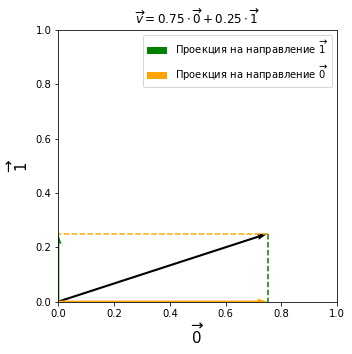

In [1]:
import numpy as np
import matplotlib.pyplot as plt

outcome_0 = np.array([1.0, 0.0])
outcome_1 = np.array([0.0, 1.0])
a = 0.75
b = 0.25

assert a + b == 1

prob_bit = a * outcome_0 + b * outcome_1

X, Y = prob_bit

plt.figure(figsize=(5,5))
plt.plot([a, 0], [b, b], '--', color='orange')
plt.plot([a, a], [b, 0], '--', color='green')

ax = plt.gca()
ax.quiver(X, Y, angles='xy', scale_units='xy', scale=1)
ax.set_xlim([0,1])
ax.set_ylim([0,1])

ax.quiver(0, Y, angles='xy', scale_units='xy', scale=1, color='green',
          label='Проекция на направление $\overrightarrow{1}$')
ax.quiver(X, 0, angles='xy', scale_units='xy', scale=1, color='orange',
          label='Проекция на направление $\overrightarrow{0}$')

plt.xlabel('$\overrightarrow{0}$', fontsize=15)
plt.ylabel('$\overrightarrow{1}$', fontsize=15)
plt.title('$\overrightarrow{v} = {a}\cdot\overrightarrow{0} + {b}\cdot\overrightarrow{1}$'.format(0, 1, v='v',
                                                                                                  a=a, b=b))

plt.legend()

plt.draw()
plt.show()

По заданному вектору-состоянию можно найти вероятности исходов $0$ и $1$, если спроецировать $\overrightarrow{v}$ на базисные векторы:
$$Pr(0) = (\overrightarrow{v}, \overrightarrow{0}) = \overrightarrow{v}^T \cdot \overrightarrow{0} = a,$$
$$Pr(1) = (\overrightarrow{v}, \overrightarrow{1}) = \overrightarrow{v}^T \cdot \overrightarrow{1} = b.$$

<div class="alert" style="border: 0px; border-left: 3px solid #F0AD4E; color: black; background-color: #FFF1E3">
<p style="color: #9B5831;">**Обозначения**</p>

**Проекцией** вектора $\overrightarrow{v}$ на направление $\overrightarrow{n}$ называется $Pr_{\overrightarrow{n}}(\overrightarrow{v}) = \frac{\left(\overrightarrow{v}, \overrightarrow{n}\right)}{\left\vert\overrightarrow{n}\right\vert}$.

В случае с проекцией на нормированный вектор (например, $\overrightarrow{0}$) знаменатель равен 1, следовательно, $Pr_{\overrightarrow{0}}(\overrightarrow{v}) = \left(\overrightarrow{v}, \overrightarrow{0}\right)$.

</div>

<div class="alert" style="border: 0px; border-left: 3px solid #119a68; color: black; background-color: #daf0e9">
<p style="color: #119a68;">**Примеры**</p>

Пусть $\overrightarrow{v} = \begin{pmatrix} a \\ a \end{pmatrix}$, тогда $Pr_{\overrightarrow{0}}(\overrightarrow{v}) = \left(\overrightarrow{v}, \overrightarrow{0}\right) = \overrightarrow{v}^T \cdot \overrightarrow{0} = \begin{pmatrix} a & b \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = a \cdot 1 + b \cdot 0 = a$.

</div>

In [2]:
print("Получаем, что a={}".format(prob_bit.dot(outcome_0)))
print("Получаем, что b={}".format(prob_bit.dot(outcome_1)))

Получаем, что a=0.75
Получаем, что b=0.25


## Обозначения Дирака / Dirac notation

$\overrightarrow{v} = |v\rangle$ - вектор **кет**,

$\overrightarrow{v}^\dagger = \overrightarrow{v}^{*T} = \langle v|$ - вектор **бра**,

$\overrightarrow{u}^\dagger \cdot \overrightarrow{v} = \langle u | v \rangle$ - скалярное произведение векторов **бра** и **кет**.

Можно переписать формулу для измерения вероятности:
$$Pr(0) = \langle v | 0 \rangle = a,$$
$$Pr(1) = \langle v | 1 \rangle = b.$$

В текущем примере $a$ и $b$ действительные числа, но на самом деле в "настоящих" бра и кет векторах компоненты являются комплексными числами ${(\in\mathbb{C})}$.

<div class="alert" style="border: 0px; border-left: 3px solid #F0AD4E; color: black; background-color: #FFF1E3">
<p style="color: #9B5831;">**Обозначения**</p>

**Комплексное сопряжение** числа $z = a + ib$ есть число $\overline{z} = z^* = a - ib$, где $z\in\mathbb{C}$, $a,b\in\mathbb{R}$.

**Длиной** или **модулем** комплексного числа $z = a + ib$ называется действительное число $\left\vert{z}\right\vert = \sqrt{z \cdot z^*} = \sqrt{a^2 + b^2} \in\mathbb{R}$.

Оператор $^\dagger$ называется **эрмитовым сопряжением**.
</div>

<div class="alert alert-success" style="border: 0px; border-left: 3px solid #119a68; color: black; background-color: #daf0e9">
<p style="color: #119a68;">**Примеры**</p>

Пусть $|v\rangle = \begin{pmatrix} -i \\ 1 \end{pmatrix}$, тогда $\langle v| = \overrightarrow{v}^\dagger = \begin{pmatrix} +i & 1  \end{pmatrix}$.

Скалярное произведение: $\langle v | v \rangle = \begin{pmatrix} +i & 1  \end{pmatrix} \cdot \begin{pmatrix} -i \\ 1  \end{pmatrix} = 1 + 1 = 2$.
</div>

## Тензорное произведение / [Kronecker product](https://en.wikipedia.org/wiki/Kronecker_product)

$|00\rangle = |0\rangle \otimes |0\rangle = \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} \otimes \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} = \begin{pmatrix} 1 \cdot \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} \\ 0 \cdot \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} \\ \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \\ \end{pmatrix}$

$|01\rangle = |0\rangle \otimes |1\rangle = \begin{pmatrix} 1 \\ 0 \\ \end{pmatrix} \otimes \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix} = \begin{pmatrix} 1 \cdot \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix} \\ 0 \cdot \begin{pmatrix} 0 \\ 1 \\ \end{pmatrix} \\ \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \\ \end{pmatrix}$

$\ldots$

## Несколько вероятностных бит / Multiple Probabilistic Bits

Рассмотрим на примере двух монеток $u$ и $v$, орёл и решку обозначим за $0$ и $1$.

Запишем состояния:

$|u\rangle = \frac{1}{2} |0_u\rangle + \frac{1}{2} |1_u\rangle$

$|v\rangle = \frac{1}{2} |0_v\rangle + \frac{1}{2} |1_v\rangle$, где $1_u$ обозначает исход $1$ у монетки $u$.

У системы из двух монеток есть 4 варианта исходов: $\left\{ 0_u 0_v, 0_u 1_v, 1_u 0_v, 1_u 1_v \right\}$ - это и есть базис состояний четырёхмерного векторного пространства.

**Комбинированное состояние** системы можно выразить через тензорное произведение: $|uv\rangle = |u\rangle \otimes |v\rangle = \frac{1}{4}|0_u 0_v \rangle + \frac{1}{4}|0_u 1_v \rangle + \frac{1}{4}|1_u 0_v\rangle + \frac{1}{4}|1_u 1_v\rangle$.

Таким образом, **комбинированное пространство** это просто тензорное произведение всех пар базисных векторов меньших пространств.

Можно встретить и такое обозначение: $\otimes_{i=0}^{n-1}|v_i\rangle = |v_0\rangle \otimes |v_1\rangle \otimes \ldots \otimes |v_{n-1}\rangle = |v_0 v_1 \ldots v_{n-1}\rangle$

<div class="alert alert-success" style="border: 0px; border-left: 3px solid #119a68; color: black; background-color: #daf0e9">
<p style="color: #119a68;">^-- **Классика** --^</p>
</div>

<div class="alert alert-success" style="border: 0px; border-left: 3px solid #119a68; color: black; background-color: #daf0e9">
<p style="color: #119a68;">v-- **Квантовая Механика начинается здесь** --v</p>
</div>

## Кубиты / Qubits

**Кубит** является квантовым аналогом классического бита, у него тоже есть два возможных исхода после измерения.

**Система** из одного кубита это двумерное **комплексное** векторное пространство, а **состояние** кубита - комплексный вектор в этом пространстве (с помощью **сферы Блоха** можно как раз представить состояние кубита в векторном пространстве, но про это чуть позже).

Задаём пространство исходов: $\left\{ |0\rangle, |1\rangle \right\}$, тогда состояние произвольного кубита запишется следующим образом: $\alpha |0\rangle + \beta |1\rangle$ (до этого было $a\cdot\overrightarrow{0} + b\cdot\overrightarrow{1}$).

Так как коэффициенты могут быть мнимыми, то они не могут интерпретироваться как вероятности соответствующих исходов (чтобы получить действительное число - необходимо возводить в квадрат). Вместо этого перепишем формулы для вычисления вероятностей:
$$Pr(0) = \left\vert\langle v | 0 \rangle\right\vert^2 = \left\vert\alpha\right\vert^2,$$
$$Pr(1) = \left\vert\langle v | 1 \rangle\right\vert^2 = \left\vert\beta\right\vert^2,$$
$$\left\vert\alpha\right\vert^2 + \left\vert\beta\right\vert^2 = 1,  \alpha, \beta \in \mathbb{C}.$$

## Сфера Блоха / Bloch Sphere

Этот переход к комплескным векторам означает слудующее - вместо того, чтобы представлять вектор состояния на плоскости, мы будем представлять его на сфере.

<img src="img/bloch.png" width=500px>

<p style="text-align: center;"><a href="https://www.researchgate.net/publication/236883187_Quantum_Search_Algorithms_Quantum_Wireless_and_a_Low-Complexity_Maximum_Likelihood_Iterative_Quantum_Multi-User_Detector_Design">Source</a></p>

Состояние из нескольких кубит может быть точно так же представлено, если взять тензорные произведения пространств и состояний. Таким образом, система из $n$ кубит будет иметь $2^n$ возможных состояний.

## Операции над кубитами / Qubits Operations

### На примере IBM Q Experience [Composer](https://quantumexperience.ng.bluemix.net/qx/editor)

<img src="img/composer.jpg" width="300px">

Так выглядит простейшая квантовая цепь, состоящая из гейтов Адамара ($H$) и $CNOT$ (**Гейт** == Операция == Матрица). В конце стоят блоки, которые отвечают за **измерение** состояния кубит в базисе $\sigma^z$.

<img src="img/simulation.jpg" width="600px">

<center>Результаты симуляции</center>

Начнём с простых операторов: тождественный оператор $I = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$ и NOT-оператор $X = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$.

Квантовые состояния могут быть представлены как комплексные векторы на сфере Блоха, а квантовые операции как матрицы со следующими свойствами:
- Обратимость ($U^{-1} = U^\dagger = U^{*T}$),
- Если их применить к вектору, лежащему на сфере Блоха, то результирующий вектор тоже будет лежать на сфере Блоха.

Матрицы, которые удовлетворяют указанным свойствам, называются **унитарными**.

Рассмотрим действие тождественного оператора:
$$I |0\rangle = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0\rangle,$$
$$I |1\rangle = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1\rangle.$$

Действие оператора NOT:
$$X |0\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \end{pmatrix} = |1\rangle,$$
$$X |1\rangle = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \end{pmatrix} = |0\rangle.$$

## Операторы Паули / Pauli Operators

$X = \sigma_1 = \begin{pmatrix} 0 & 1 \\ 1 & 0 \end{pmatrix}$, $Y = \sigma_2 = \begin{pmatrix} 0 & -i \\ i & 0 \end{pmatrix}$, $Z = \sigma_3 = \begin{pmatrix} 1 & 0 \\ 0 & -1 \end{pmatrix}$.

Матрицы Паули осуществляют поворот на 180 градусов вектора, который представляет состояние кубита на сфере Блоха. Например, гейт $X$ осуществляет поворот вокруг оси $x$ на 180 градусов

## Операции над несколькими кубитами / Multi-Qubit Operations

Наиболее распространённым примером служит гейт Controlled-NOT (CNOT), который применяется к двум кубитам: $CNOT = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix}$

Состояние второго кубита меняется на противоположное тогда и только тогда, когда состояние первого кубита $|1\rangle$.

Рассмотрим действие оператора $CNOT$ на двухкубитные состояния:

$CNOT |00\rangle = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\ 0 \end{pmatrix} = |00\rangle$

$CNOT |01\rangle = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 1 \\ 0 \\ 0 \end{pmatrix} = |01\rangle$

$CNOT |10\rangle = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} = |11\rangle$

$CNOT |11\rangle = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \end{pmatrix} \begin{pmatrix} 0 \\ 0 \\ 0 \\ 1 \end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix} = |10\rangle$


Другой пример двухкубитного гейта: $SWAP = \begin{pmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \end{pmatrix}$, который меняет состояния $|10\rangle$ и $|01\rangle$ местами.

## Гейт Адамара / Hadamard Gate

$H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$:

$H|0\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle + |1\rangle\right) = |+\rangle$,

$H|1\rangle = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} \begin{pmatrix} 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix} = \frac{1}{\sqrt{2}} \left(|0\rangle - |1\rangle\right) = |-\rangle$.

Можно видеть, что оба вектора таких состояний лежат на "экваторе" сферы Блоха. Вероятности обнаружить $0$ или $1$ после измерения одинаковы и равны $\frac{1}{2}$.

Таким образом, кубит в одном из таких состояний представляет монетку, которая равновероятно может упасть на орла или решку.

## Иерархия: высокоуровневый язык программирования -> низкоуровневый компилятор

<img src='img/hierarchy.jpg' width='60%'>
<p style="text-align: center;"> <a href="https://www.nature.com/articles/nature18648">Source</a> </p>

- [ ] больше про тензорное произведение
- [ ] про собственные значения/векторы матриц
- [ ] теория про кубиты, про понятие измерения
- [ ] про измерения в базисе